In [1]:
import pandas as pd
import seaborn as se
import pickle
from collections import Counter
import numpy as np
import os
import pickle
from timeit import timeit
import json
from timeit import default_timer as timer
from pathlib import Path
import shutil
import math
import matplotlib.pyplot as plt
from math import sqrt
from tqdm import tqdm
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt


In [2]:
se.set_style("darkgrid")

895.1846545046152

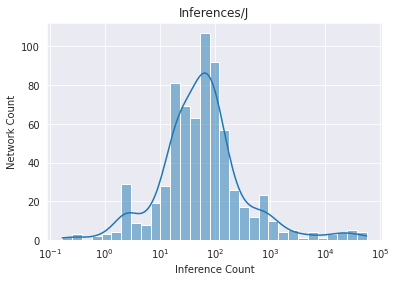

In [3]:
arch_metrics = pd.read_csv('../data/arch_metrics_iofmap_1mb.csv', index_col=[0,1],)

inferences_per_joule = arch_metrics[["dram_energy", "ifmap_sram_energy", "psum_sram_energy", "reuse_chain_sram_energy", "weight_sram_energy", "mac_energy"]].groupby(level=0).sum().sum(axis=1).pow(-1)
plt = se.histplot(inferences_per_joule, log_scale=True, kde=True)
plt.set_xscale('log', base=10)
plt.set_xlabel('Inference Count')
plt.set_ylabel('Network Count')
plt.set_title('Inferences/J')
inferences_per_joule.mean()

106123.39954374016

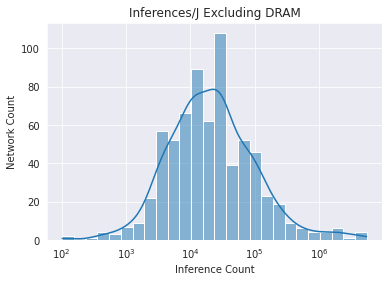

In [4]:
arch_metrics = pd.read_csv('../data/arch_metrics_iofmap_1mb.csv', index_col=[0,1],)

inferences_per_joule = arch_metrics[["ifmap_sram_energy", "psum_sram_energy", "reuse_chain_sram_energy", "weight_sram_energy", "mac_energy"]].groupby(level=0).sum().sum(axis=1).pow(-1)
plt = se.histplot(inferences_per_joule, log_scale=True, kde=True)
plt.set_xscale('log', base=10)
plt.set_xlabel('Inference Count')
plt.set_ylabel('Network Count')
plt.set_title('Inferences/J Excluding DRAM')
inferences_per_joule.mean()

<AxesSubplot:>

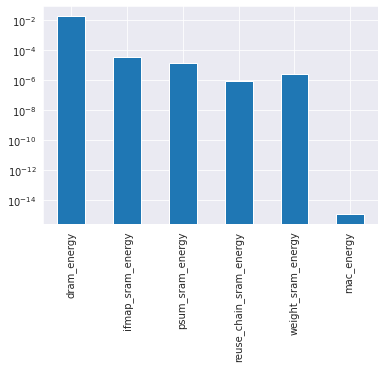

In [5]:
arch_metrics = pd.read_csv('../data/arch_metrics_iofmap_1mb.csv', index_col=[0,1],)

energy_per_inference = arch_metrics[["dram_energy", "ifmap_sram_energy", "psum_sram_energy", "reuse_chain_sram_energy", "weight_sram_energy", "mac_energy"]].groupby(level=0).sum()
energy_per_inference.median().plot(kind='bar', log=True)